# DATA.STAT.840 Statistical Methods for Text Data Analysis
# Exercises 3

### Daniel Kusnetsoff

In [1]:
import requests
import bs4
import re
import numpy as np

In [2]:
#%% Get the text content of the page
def getpagetext(parsedpage):
    # Remove HTML elements that are scripts
    scriptelements=parsedpage.find_all('script')
    # Concatenate the text content from all table cells
    for scriptelement in scriptelements:
        # Extract this script element from the page.
        # This changes the page given to this function!
        scriptelement.extract()
    pagetext=parsedpage.get_text()
    return(pagetext)

In [3]:

def top_gutenberg_ebooks(seed_page_url, top_k):
    ebook_titles=[]
    amount_books_downloaded=0
    texts_downloaded=[]
    ebook_addresses=[]
    url_to_download= "https://www.gutenberg.org/files/"
    
    seed_page_parsed = requests.get(seed_page_url)
    h2_tag=bs4.BeautifulSoup(seed_page_parsed.content, 'html.parser').find(id='books-last30')
    ol_tag = h2_tag.next_sibling.next_sibling
    for a_tag in ol_tag.find_all('a'):
        # find matching pattern for ebook name
        name_match = re.match(r'(.*)(\(\d+\))', a_tag.text)
        ebook_name = name_match.group(1).strip()
        # find matching pattern for ebook id
        id_match = re.match(r'/ebooks/(\d+)', a_tag.get('href'))
        ebook_id = id_match.group(1)
        ebook_url = url_to_download + ebook_id + '/' + ebook_id + '-0.txt'
        # checking book is not alreydy downloaded
        if (ebook_url not in ebook_addresses) & (amount_books_downloaded < top_k):
            print('Downloading text file from:')
            print(ebook_url)
            ebook_page = requests.get(ebook_url)
            parsed_page = bs4.BeautifulSoup(ebook_page.content, 'html.parser')
            # get text from the ebook
            ebook_text = getpagetext(parsed_page)
            start_index = ebook_text.find('*** START OF THE PROJECT GUTENBERG EBOOK')
            end_index = ebook_text.find('*** END OF THE PROJECT GUTENBERG EBOOK')
            ebook_text = ebook_text[start_index:end_index]
            # remove leading and trailing whitespaces
            ebook_text = ebook_text.strip()
            ebook_text = ' '.join(ebook_text.split())
            # store book content
            texts_downloaded.append(ebook_text)
            ebook_addresses.append(ebook_url)
            ebook_titles.append(ebook_name)
            amount_books_downloaded += 1
            
    return(texts_downloaded, ebook_titles, ebook_addresses, amount_books_downloaded)

In [4]:
texts_downloaded, ebook_titles, ebook_addresses, amount_books_downloaded =top_gutenberg_ebooks('https://www.gutenberg.org/browse/scores/top', 20)

https://www.gutenberg.org/files/2641/2641-0.txt
https://www.gutenberg.org/files/145/145-0.txt
https://www.gutenberg.org/files/37106/37106-0.txt
https://www.gutenberg.org/files/16389/16389-0.txt
https://www.gutenberg.org/files/67979/67979-0.txt
https://www.gutenberg.org/files/394/394-0.txt
https://www.gutenberg.org/files/1342/1342-0.txt
https://www.gutenberg.org/files/84/84-0.txt
https://www.gutenberg.org/files/2701/2701-0.txt
https://www.gutenberg.org/files/345/345-0.txt
https://www.gutenberg.org/files/11/11-0.txt
https://www.gutenberg.org/files/1661/1661-0.txt
https://www.gutenberg.org/files/1952/1952-0.txt
https://www.gutenberg.org/files/25344/25344-0.txt
https://www.gutenberg.org/files/100/100-0.txt
https://www.gutenberg.org/files/174/174-0.txt
https://www.gutenberg.org/files/98/98-0.txt
https://www.gutenberg.org/files/1080/1080-0.txt
https://www.gutenberg.org/files/6761/6761-0.txt
https://www.gutenberg.org/files/2160/2160-0.txt


In [5]:
ebook_titles, ebook_addresses, amount_books_downloaded

(['A Room with a View by E. M.  Forster',
  'Middlemarch by George Eliot',
  'Little Women; Or, Meg, Jo, Beth, and Amy by Louisa May Alcott',
  'The Enchanted April by Elizabeth Von Arnim',
  'The Blue Castle: a novel by L. M.  Montgomery',
  'Cranford by Elizabeth Cleghorn Gaskell',
  'Pride and Prejudice by Jane Austen',
  'Frankenstein; Or, The Modern Prometheus by Mary Wollstonecraft Shelley',
  'Moby Dick; Or, The Whale by Herman Melville',
  'Dracula by Bram Stoker',
  "Alice's Adventures in Wonderland by Lewis Carroll",
  'The Adventures of Sherlock Holmes by Arthur Conan Doyle',
  'The Yellow Wallpaper by Charlotte Perkins Gilman',
  'The Scarlet Letter by Nathaniel Hawthorne',
  'The Complete Works of William Shakespeare by William Shakespeare',
  'The Picture of Dorian Gray by Oscar Wilde',
  'A Tale of Two Cities by Charles Dickens',
  'A Modest Proposal by Jonathan Swift',
  'The Adventures of Ferdinand Count Fathom — Complete by T.  Smollett',
  'The Expedition of Humphry 

In [6]:
#%% Tokenize loaded texts and change them to NLTK format
import nltk

mycrawled_nltktexts=[]
for k in range(len(texts_downloaded)):
    temp_tokenizedtext=nltk.word_tokenize(texts_downloaded[k])
    temp_nltktext=nltk.Text(temp_tokenizedtext)
    mycrawled_nltktexts.append(temp_nltktext)

In [7]:
mycrawled_nltktexts[19]

<Text: ...>

In [8]:
mycrawled_lowercasetexts = []
for k in range(len(mycrawled_nltktexts)):
    temp_lowercasetext = []
    for l in range(len(mycrawled_nltktexts[k])):
        lowercaseword = mycrawled_nltktexts[k][l].lower()
        temp_lowercasetext.append(lowercaseword)
    temp_lowercasetest = nltk.Text(temp_lowercasetext)
    mycrawled_lowercasetexts.append(temp_lowercasetext)    




In [9]:
def tagtowordnet(postag):
    wordnettag=-1
    if postag[0]=='N':
        wordnettag='n'
    elif postag[0]=='V':
        wordnettag='v'
    elif postag[0]=='J':
        wordnettag='a'
    elif postag[0]=='R':
        wordnettag='r'
    return(wordnettag)

In [10]:
# Download wordnet resource if you do not have it already
nltk.download('wordnet')
# Download tagger resource if you do not have it already
nltk.download('averaged_perceptron_tagger')

lemmatizer=nltk.stem.WordNetLemmatizer()

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\danie\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\danie\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [11]:

def lemmatizetext(nltktexttolemmatize):
    # Tag the text with POS tags
    taggedtext=nltk.pos_tag(nltktexttolemmatize)
    # Lemmatize each word text
    lemmatizedtext=[]
    for l in range(len(taggedtext)):
        # Lemmatize a word using the WordNet converted POS tag
        wordtolemmatize=taggedtext[l][0]
        wordnettag=tagtowordnet(taggedtext[l][1])
        if wordnettag!=-1:
            lemmatizedword=lemmatizer.lemmatize(wordtolemmatize,wordnettag)
        else:
            lemmatizedword=wordtolemmatize
        # Store the lemmatized word
        lemmatizedtext.append(lemmatizedword)
    return(lemmatizedtext)

mycrawled_lemmatizedtexts=[]
for k in range(len(mycrawled_lowercasetexts)):
    lemmatizedtext=lemmatizetext(mycrawled_lowercasetexts[k])
    lemmatizedtext=nltk.Text(lemmatizedtext)
    mycrawled_lemmatizedtexts.append(lemmatizedtext)

In [12]:
import numpy as np
myvocabularies=[]
myindices_in_vocabularies=[]
# Find the vocabulary of each document
for k in range(len(mycrawled_lemmatizedtexts)):
    # Get unique words and where they occur
    temptext=mycrawled_lemmatizedtexts[k]
    uniqueresults=np.unique(temptext,return_inverse=True)
    uniquewords=uniqueresults[0]
    wordindices=uniqueresults[1]
    # Store the vocabulary and indices of document words in it
    myvocabularies.append(uniquewords)
    myindices_in_vocabularies.append(wordindices)
myvocabularies[0]
    

array(['!', '(', ')', ..., '’', '“', '”'], dtype='<U22')

In [13]:
tempvocabulary=[]
for k in range(len(mycrawled_lemmatizedtexts)):
    tempvocabulary.extend(myvocabularies[k])
    
# Find the unique elements among all vocabularies
uniqueresults=np.unique(tempvocabulary,return_inverse=True)
unifiedvocabulary=uniqueresults[0]
wordindices=uniqueresults[1]




In [14]:
# Translate previous indices to the unified vocabulary.

vocabularystart=0
myindices_in_unifiedvocabulary=[]
for k in range(len(mycrawled_lemmatizedtexts)):
    # In order to shift word indices, we must temporarily
    # change their data type to a Numpy array
    tempindices=np.array(myindices_in_vocabularies[k])
    tempindices=tempindices+vocabularystart
    tempindices=wordindices[tempindices]
    myindices_in_unifiedvocabulary.append(tempindices)
    vocabularystart=vocabularystart+len(myvocabularies[k])

In [15]:
unifiedvocabulary_totaloccurrencecounts=np.zeros((len(unifiedvocabulary),1))
unifiedvocabulary_documentcounts=np.zeros((len(unifiedvocabulary),1))
unifiedvocabulary_meancounts=np.zeros((len(unifiedvocabulary),1))
unifiedvocabulary_countvariances=np.zeros((len(unifiedvocabulary),1))

In [16]:
# First pass: count occurrences
for k in range(len(mycrawled_lemmatizedtexts)):
    print(k)
    occurrencecounts=np.zeros((len(unifiedvocabulary),1))
    for l in range(len(myindices_in_unifiedvocabulary[k])):
        occurrencecounts[myindices_in_unifiedvocabulary[k][l]]= \
            occurrencecounts[myindices_in_unifiedvocabulary[k][l]]+1
    unifiedvocabulary_totaloccurrencecounts= \
        unifiedvocabulary_totaloccurrencecounts+occurrencecounts
    unifiedvocabulary_documentcounts= \
        unifiedvocabulary_documentcounts+(occurrencecounts>0)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19


In [17]:
# Mean occurrence counts over documents
unifiedvocabulary_meancounts= \
    unifiedvocabulary_totaloccurrencecounts/len(mycrawled_lemmatizedtexts)

In [19]:
# Second pass to count variances
for k in range(len(mycrawled_lemmatizedtexts)):
    print(k)
    occurrencecounts=np.zeros((len(unifiedvocabulary),1))
    for l in range(len(myindices_in_unifiedvocabulary[k])):
        occurrencecounts[myindices_in_unifiedvocabulary[k][l]]= \
            occurrencecounts[myindices_in_unifiedvocabulary[k][l]]+1
    unifiedvocabulary_countvariances=unifiedvocabulary_countvariances+ \
        (occurrencecounts-unifiedvocabulary_meancounts)**2
unifiedvocabulary_countvariances= \
    unifiedvocabulary_countvariances/(len(mycrawled_lemmatizedtexts)-1)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19


In [20]:
#%% Inspect frequent words
# Sort words by largest total (or mean) occurrence count
highest_totaloccurrences_indices=np.argsort(\
    -1*unifiedvocabulary_totaloccurrencecounts,axis=0)    
print(np.squeeze(unifiedvocabulary[\
    highest_totaloccurrences_indices[1:100]]))
print(np.squeeze(\
    unifiedvocabulary_totaloccurrencecounts[\
    highest_totaloccurrences_indices[1:100]]))

['.' 'the' 'be' 'and' 'to' 'of' 'i' 'a' 'in' 'have' 'that' '’' ';' 'you'
 'it' 'he' 'his' 'not' 'with' '“' 'my' '”' 'for' 'her' 'as' '?' 'but'
 'she' '!' 'me' 'do' 'this' 'him' 'at' 's' 'on' 'say' 'so' 'all' 'by'
 'what' 'your' 'which' 'will' 'no' 'if' 'from' 'we' 'come' 'would' 'there'
 'they' 'go' 'one' ':' 'when' 'make' 'or' 'know' 'now' 'an' 'thou' 'more'
 'good' 'them' 'then' 'their' 'see' 'shall' 'who' 'like' 'out' 'can' 'our'
 'think' 'man' 'look' 'could' 'some' 'than' 'up' 'well' 'take' 'd' "'s"
 'how' 'thy' 'mr.' 'very' "'d" 'should' 'give' 'time' 'must' 'here' 'lord'
 'upon' 'into' 'sir']
[147065. 109843.  92069.  78476.  65040.  63207.  52477.  49821.  38925.
  36317.  35301.  31748.  31470.  29285.  29181.  27465.  23945.  22741.
  22358.  22348.  21718.  21289.  20521.  20150.  19830.  18896.  18055.
  16900.  16332.  15394.  15374.  13951.  13831.  13280.  13137.  12649.
  12412.  12400.  11748.  10694.  10391.  10369.   9593.   9416.   9247.
   9121.   9041.   8833.   83

In [21]:
# Sort words by largest total document count
highest_documentoccurrences_indices=np.argsort(\
    -1*unifiedvocabulary_documentcounts,axis=0)
print(np.squeeze(unifiedvocabulary[\
    highest_documentoccurrences_indices[1:100]]))
print(np.squeeze(\
    unifiedvocabulary_documentcounts[\
    highest_documentoccurrences_indices[1:100]]))

['proper' 'a' 'put' 'question' 'ready' 'real' 'reason' 'repeat' 'rest'
 'round' 'child' 'same' 'project' 'say' 'seem' 'seldom' 'several' 'shall'
 'she' 'should' 'since' 'certain' 'so' 'some' 'something' 'soon' 'see'
 'able' 'possibly' 'about' 'again' 'after' 'of' 'off' 'often' 'old' 'on'
 'one' 'or' 'order' 'other' 'others' 'our' 'out' 'own' 'common' 'add'
 'people' 'act' 'perhaps' 'come' 'person' 'piece' 'account' 'please'
 'pleased' 'poor' 'sound' 'now' 'stand' 'stay' 'till' 'by' 'time' 'to'
 'too' 'but' 'trouble' 'turn' 'two' 'under' 'up' 'upon' 'through' '.'
 'use' 'bring' ',' '***' 'very' 'walk' 'want' 'way' 'we' 'well' 'what'
 'when' 'us' 'three' 'those' 'this' 'steal' 'stir' 'strength' 'such'
 'summer' 'care' '?' ';']
[17. 17. 17. 17. 17. 17. 17. 17. 17. 17. 17. 17. 17. 17. 17. 17. 17. 17.
 17. 17. 17. 17. 17. 17. 17. 17. 17. 17. 17. 17. 17. 17. 17. 17. 17. 17.
 17. 17. 17. 17. 17. 17. 17. 17. 17. 17. 17. 17. 17. 17. 17. 17. 17. 17.
 17. 17. 17. 17. 17. 17. 17. 17. 17. 17. 17. 1

In [22]:
# Sort by largest variance of count over documents
highest_countvariances_indices=np.argsort(\
    -1*unifiedvocabulary_countvariances,axis=0)
print(np.squeeze(unifiedvocabulary[\
    highest_countvariances_indices[1:100]]))
print(np.squeeze(\
    unifiedvocabulary_countvariances[\
    highest_countvariances_indices[1:100]]))

['.' 'the' 'be' 'and' 'i' 'to' 'of' '’' ';' 'a' 'you' 'my' 'in' 'that' '?'
 'not' 'have' 'with' '!' 'it' 'he' 'for' 'me' 'his' 'this' 'your' 'but'
 'do' 'as' 'thou' '“' '”' 'her' 'him' 'so' 'will' 's' 'what' 'd' ':' 'thy'
 "'d" 'all' 'she' 'by' 'no' 'we' 'shall' 'if' 'come' 'on' 'lord' "'s"
 'say' ']' '[' 'good' 'thee' 'king' 'our' 'make' 'at' 'o' 'sir' 'which'
 'from' 'now' 'go' 'they' 'love' 'would' 'or' 'more' 'let' 'there' 'know'
 'then' 'here' 'well' 'their' 'enter' 'when' 'how' 'can' 'one' 'man'
 'give' 'them' 'hath' 'mr.' 'an' 'like' '``' 'than' '--' "''" 'see' 'upon'
 'us']
[3.32562821e+08 5.18423892e+07 4.63649997e+07 4.03818997e+07
 2.79569457e+07 2.35751284e+07 1.96035854e+07 1.48161824e+07
 1.45613922e+07 1.40028851e+07 1.06789191e+07 8.76503323e+06
 8.23200298e+06 7.92677734e+06 6.16240417e+06 4.95080803e+06
 4.85116480e+06 3.72885905e+06 3.60667473e+06 3.52609579e+06
 3.47089229e+06 3.44034687e+06 3.41025043e+06 3.39194414e+06
 2.54568659e+06 2.52365978e+06 2.35781805e+06

# Ex 2.4 Pruning

In [23]:
nltk.download('stopwords')

#%% Vocabulary pruning
nltkstopwords=nltk.corpus.stopwords.words('english')
pruningdecisions=np.zeros((len(unifiedvocabulary),1))
for k in range(len(unifiedvocabulary)):
    # Rule 1: check the nltk stop word list
    if (unifiedvocabulary[k] in nltkstopwords):
        pruningdecisions[k]=1
    # Rule 2: if the word is in the top 1% of frequent words
    if (k in highest_totaloccurrences_indices[\
        0:int(np.floor(len(unifiedvocabulary)*0.01))]):
        pruningdecisions[k]=1
   # Rule 3: if the word occurs less than 4 times
    if(unifiedvocabulary_totaloccurrencecounts[k] < 4):
        pruningdecisions[k] = 1
    # Rule 4: if the word is too short
    if len(unifiedvocabulary[k])<2:
        pruningdecisions[k]=1
    # Rule 5: if the word is too long
    if len(unifiedvocabulary[k])>20:
        pruningdecisions[k]=1
    # Rule 6: if the word has unwanted characters
    # (here for simplicity only a-z allowed)
    if unifiedvocabulary[k].isalpha()==False:
        pruningdecisions[k]=1

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\danie\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [24]:
#%% Get indices of documents to remaining words
oldtopruned=[]
tempind=-1
for k in range(len(unifiedvocabulary)):
    if pruningdecisions[k]==0:
        tempind=tempind+1
        oldtopruned.append(tempind)
    else:
        oldtopruned.append(-1)

In [25]:
#%% Create pruned texts
mycrawled_prunedtexts=[]
myindices_in_prunedvocabulary=[]
for k in range(len(mycrawled_lemmatizedtexts)):
    print(k)
    temp_newindices=[]
    temp_newdoc=[]
    for l in range(len(mycrawled_lemmatizedtexts[k])):
        temp_oldindex=myindices_in_unifiedvocabulary[k][l]
        temp_newindex=oldtopruned[temp_oldindex]
        if temp_newindex!=-1:
            temp_newindices.append(temp_newindex)
            temp_newdoc.append(unifiedvocabulary[temp_oldindex])
    mycrawled_prunedtexts.append(temp_newdoc)
    myindices_in_prunedvocabulary.append(temp_newindices)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19


In [26]:
#%% Inspect remaining frequent words
# Sort remaining words by largest total (or mean) occurrence count
remainingindices=np.squeeze(np.where(pruningdecisions==0)[0])
remainingvocabulary=unifiedvocabulary[remainingindices]
remainingvocabulary_totaloccurrencecounts= \
    unifiedvocabulary_totaloccurrencecounts[remainingindices]
remaining_highest_totaloccurrences_indices= \
    np.argsort(-1*remainingvocabulary_totaloccurrencecounts,axis=0)
print(np.squeeze(remainingvocabulary[remaining_highest_totaloccurrences_indices[1:100]]))
print(np.squeeze(remainingvocabulary_totaloccurrencecounts[ \
remaining_highest_totaloccurrences_indices[1:100]]))

['fit' 'rome' 'promise' 'drop' 'pain' 'free' 'four' 'note' 'red' 'glad'
 'view' 'consider' 'hence' 'fell' 'trust' 'holmes' 'ill' 'drive' 'duty'
 'chance' 'catch' 'marriage' 'possible' 'line' 'devil' 'neither' 'clear'
 'alice' 'past' 'comfort' 'crown' 'offer' 'mouth' 'common' 'count' 'start'
 'wall' 'sorrow' 'afraid' 'ring' 'pardon' 'mad' 'object' 'opinion'
 'fisher' 'attend' 'warwick' 'wild' 'worth' 'company' 'effect' 'breath'
 'ah' 'eat' 'forward' 'able' 'messenger' 'seat' 'enemy' 'quickly' 'ten'
 'blow' 'except' 'law' 'evening' 'hester' 'hat' 'five' 'darcy' 'choose'
 'secret' 'farewell' 'dorian' 'visit' 'third' 'false' 'grief' 'regard'
 'wit' 'spend' 'stone' 'sake' 'brooke' 'service' 'fault' 'hundred' 'er'
 'gold' 'command' 'celia' 'edward' 'james' 'interest' 'behold' 'dress'
 'exit' 'content' 'matty' 'observe']
[465. 465. 465. 464. 463. 463. 463. 463. 463. 461. 461. 460. 460. 460.
 460. 457. 454. 453. 453. 452. 449. 447. 447. 445. 445. 443. 442. 441.
 440. 439. 438. 436. 436. 435. 4

# Ex 3.1

In [27]:
import scipy

def download_specific_ebook(ebook_url):
    ebook_page = requests.get(ebook_url)
    parsed_page = bs4.BeautifulSoup(ebook_page.content, 'html.parser')
    ebook_text = getpagetext(parsed_page)
    start_text = '*** START OF THIS PROJECT GUTENBERG EBOOK THE CALL OF THE WILD ***'
    start_index = ebook_text.find(start_text)
    end_index = ebook_text.find('*** END OF THE PROJECT GUTENBERG EBOOK')
    ebook_text = ebook_text[start_index + len(start_text):end_index]
    
    # remove whitespaces
    ebook_text = ebook_text.strip()
    ebook_text = ' '.join(ebook_text.split())
    return(ebook_text)

In [28]:
# Download book
ebook_text = download_specific_ebook('https://www.gutenberg.org/files/1342/1342-0.txt')

In [29]:
# tokenize text
tokenized_text = nltk.word_tokenize(ebook_text)
# NLTK-format text
nltk_texts = nltk.Text(tokenized_text)
# lowercase the text 
lowercase_texts = []
for l in range(len(nltk_texts)):
    lowercase_word = nltk_texts[l].lower()
    lowercase_texts.append(lowercase_word)

In [30]:
def tagtowordnet(postag):
    wordnettag=-1
    if postag[0]=='N':
        wordnettag='n'
    elif postag[0]=='V':
        wordnettag='v'
    elif postag[0]=='J':
        wordnettag='a'
    elif postag[0]=='R':
        wordnettag='r'
    return(wordnettag)

In [31]:
# Download wordnet resource if you do not have it already
nltk.download('wordnet')
# Download tagger resource if you do not have it already
nltk.download('averaged_perceptron_tagger')

lemmatizer=nltk.stem.WordNetLemmatizer()

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\danie\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\danie\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [32]:

def lemmatizetext(nltktexttolemmatize):
    # Tag the text with POS tags
    taggedtext=nltk.pos_tag(nltktexttolemmatize)
    # Lemmatize each word text
    lemmatizedtext=[]
    for l in range(len(taggedtext)):
        # Lemmatize a word using the WordNet converted POS tag
        wordtolemmatize=taggedtext[l][0]
        wordnettag=tagtowordnet(taggedtext[l][1])
        if wordnettag!=-1:
            lemmatizedword=lemmatizer.lemmatize(wordtolemmatize,wordnettag)
        else:
            lemmatizedword=wordtolemmatize
        # Store the lemmatized word
        lemmatizedtext.append(lemmatizedword)
    return(lemmatizedtext)


# lemmatization of text
lemmatized_texts = lemmatizetext(lowercase_texts)
lemmatized_texts = nltk.Text(lemmatized_texts)

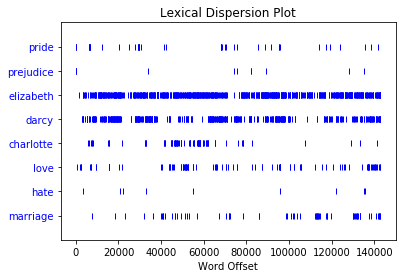

In [34]:
# lexical dispersion plots
lemmatized_texts.dispersion_plot(['pride', 'prejudice', 'elizabeth', 'darcy', 'charlotte', 'love', 'hate', 'marriage'])

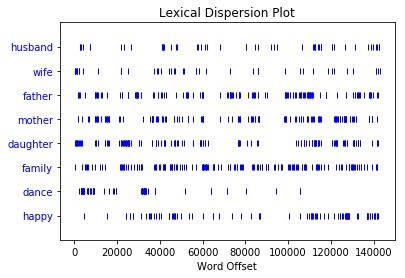

In [35]:
lemmatized_texts.dispersion_plot(['husband', 'wife', 'father', 'mother', 'daughter', 'family', 'dance', 'happy'])

Ex 3.1 C

The word elizabeth clearly appears most in the book, compared to other recurring words. This means that we can assume that Elizabeth is one of the main characters or the main charcter in the book. We can also see that the the use of the Elizabeth only pauses for shorter instances and is clearly critical for the happenings or plot of the book.

The word darcy appears to be the second most used word of these words. Darcy is also used throughout the story and appears in most of the same parts as elizabeth. We can assume, that both Darcy and Elizabeth have a connection between each other.

The third most used word is family. It is clearly used less than the two previously presented words. However it seems to be a continuous theme throughout the book.

From the plots we can make good assumptions on what the book is about. According to the plots Elizabeth and Darcy are two of the main characters of the book. As the book focuses on themes such as family, love and marriage, we may assume that there is some kind of non-platonic or even romantic connection between Elizabeth and Darcy. As the ending of the book is filled with the word darcy, elizabeth and specifically love, we can assume an ending to the book that is based on this love.

# Ex 3.2

In [36]:
ebook_text = download_specific_ebook('https://www.gutenberg.org/files/84/84-0.txt')

In [37]:
# tokenize text
tokenized_text = nltk.word_tokenize(ebook_text)
# NLTK-format text
nltk_texts = nltk.Text(tokenized_text)
# lowercase the text 
lowercase_texts = []
for l in range(len(nltk_texts)):
    lowercase_word = nltk_texts[l].lower()
    lowercase_texts.append(lowercase_word)

In [38]:
# lemmatize the text
lemmatized_texts = lemmatizetext(lowercase_texts)
# NLTK the text
lemmatized_texts = nltk.Text(lemmatized_texts)


In [39]:
lemmatized_texts.concordance('science',lines=80)
#Due to using NLTK 3.2 command only shows first 25 by default. 
#Using concordance_list we can see there are actually 29 matches
#Also by counting the times words occur in the text.

science=lemmatized_texts
from collections import Counter
word_counts = Counter(science)

print(f'"science" appears {word_counts["science"]} time(s)')

Displaying 25 of 25 matches:
cine , and those branch of physical science from which a naval adventurer might
ch lead to my predilection for that science . when i be thirteen year of age we
explode and that a modern system of science have be introduce which possess muc
in the great disdain for a would-be science which could never even step within 
e branch of study appertain to that science as be build upon secure foundation 
t deeply imbue in the secret of his science . he ask me several question concer
progress in the different branch of science appertain to natural philosophy . i
 by the modern professor of natural science . with a confusion of idea only to 
ry different when the master of the science seek immortality and power ; such v
hose vision on which my interest in science be chiefly found . i be require to 
ry view of the present state of the science and explain many of its elementary 
get : “ the ancient teacher of this science , ” say he , “ promise impossibilit
ent study a

In [40]:
lemmatized_texts.concordance_list('science', lines = 80)

[ConcordanceLine(left=['devote', 'my', 'night', 'to', 'the', 'study', 'of', 'mathematics', ',', 'the', 'theory', 'of', 'medicine', ',', 'and', 'those', 'branch', 'of', 'physical'], query='science', right=['from', 'which', 'a', 'naval', 'adventurer', 'might', 'derive', 'the', 'great', 'practical', 'advantage', '.', 'twice', 'i', 'actually', 'hire', 'myself', 'as'], offset=1127, left_print='cine , and those branch of physical', right_print='from which a naval adventurer might', line='cine , and those branch of physical science from which a naval adventurer might'),
 ConcordanceLine(left=['desire', ',', 'therefore', ',', 'in', 'this', 'narration', ',', 'to', 'state', 'those', 'fact', 'which', 'lead', 'to', 'my', 'predilection', 'for', 'that'], query='science', right=['.', 'when', 'i', 'be', 'thirteen', 'year', 'of', 'age', 'we', 'all', 'go', 'on', 'a', 'party', 'of', 'pleasure', 'to', 'the'], offset=9523, left_print='ch lead to my predilection for that', right_print='. when i be thirteen 

In [41]:
lemmatized_texts.concordance('horror', lines=100)
horror=lemmatized_texts
#Actually 49 matches according to the concordance_list and counting
word_counts = Counter(horror)

#lemmatized_texts.concordance('horror', lines=100)
print(f'"horror" appears {word_counts["horror"]} time(s)')

Displaying 25 of 25 matches:
ould be impress with no supernatural horror . i do not ever remember to have tre
ding-places . who shall conceive the horror of my secret toil as i dabble among 
of the dream vanish , and breathless horror and disgust fill my heart . unable t
flannel . i start from my sleep with horror ; a cold dew cover my forehead , my 
e . oh ! no mortal could support the horror of that countenance . a mummy again 
 extreme weakness . mingle with this horror , i felt the bitterness of disappoin
his hand , and in a moment forgot my horror and misfortune ; i felt suddenly , a
 will and power to effect purpose of horror , such as the deed which he have now
e to announce publicly ; its astound horror would be look upon as madness by the
t could make the murder memorable in horror . justine also be a girl of merit an
e place round his neck , a murmur of horror and indignation fill the court . jus
 countenance have alter . surprise , horror , and misery be strongly express . s

In [42]:
word_counts = Counter(horror)

#lemmatized_texts.concordance('horror', lines=100)
print(f'"horror" appears {word_counts["horror"]} time(s)')

"horror" appears 49 time(s)


In [43]:
lemmatized_texts.concordance('monster', lines=100)
monster=lemmatized_texts
#Actually 32 matches according to the concordance_list and counting
word_counts = Counter(monster)

print(f'"monster" appears {word_counts["monster"]} time(s)')

Displaying 25 of 25 matches:
, i behold the wretch—the miserable monster whom i have create . he hold up the
walk about . i dread to behold this monster , but i fear still more that henry 
me ! save me ! ” i imagine that the monster seize me ; i struggle furiously and
estore me to life . the form of the monster on whom i have bestow existence be 
almost begin to think that i be the monster that he say i be . he threaten exco
, and i live in daily fear lest the monster whom i have create should perpetrat
come home , and men appear to me as monster thirst for each other ’ s blood . y
d of your remain friends. ” “ abhor monster ! fiend that thou art ! the torture
y convince that i be in reality the monster that i be , i be fill with the bitt
d of none like me . be i , then , a monster , a blot upon the earth , from whic
accurse creator ! why do you form a monster so hideous that even _you_ turn fro
lently . ‘ let me go , ’ he cry ; ‘ monster ! ugly wretch ! you wish to eat me 
ou must com

In [44]:
lemmatized_texts.concordance('fear', lines=100)
fear=lemmatized_texts
#Actually 66 matches according to the concordance_list and counting
word_counts = Counter(fear)

print(f'"fear" appears {word_counts["fear"]} time(s)')

Displaying 25 of 25 matches:
and they be sufficient to conquer all fear of danger or death and to induce me t
 however , lay to until the morning , fear to encounter in the dark those large 
ore he be able to speak , and i often fear that his suffering have deprive him o
mong the tame scene of nature i might fear to encounter your unbelief , perhaps 
 at a tale of superstition or to have fear the apparition of a spirit . darkness
tion , listen attentively , catch and fear each sound as if it be to announce th
 if i seek to avoid the wretch whom i fear every turning of the street would pre
my heart palpitate in the sickness of fear , and i hurry on with irregular step 
who , on a lonely road , doth walk in fear and dread , and , have once turn roun
 dread to behold this monster , but i fear still more that henry should see him 
climb the hill or row on the lake . i fear that he will become an idle unless we
sent to my recollection , but which i fear the detail to another would only impr

The amounts for the words are:
science: 29
horror: 49
monster: 32
fear: 66
The word fear is clearly the most popular of  the four words followed by the word horror.

As we take a closer look at the words we can see, that The word science is usually preceded by the
words the, of and in.

The word horror is usualy preceded by the words with, of and the.

The word monster is usually preceded by the word the and sometimes the word a. There are often exlamation marks near the word monster.

The most popular word fear is often preceded by the word I. 

# EX 3.3

In [45]:
ebook1_text = download_specific_ebook('https://www.gutenberg.org/files/215/215-0.txt')

In [46]:
ebook1_text

'Produced by Ryan, Kirstin, Linda and Rick Trapp, and David Widger cover The Call of the Wild by Jack London Contents Chapter I. Into the Primitive Chapter II. The Law of Club and Fang Chapter III. The Dominant Primordial Beast Chapter IV. Who Has Won to Mastership Chapter V. The Toil of Trace Chapter VI. For the Love of a Man Chapter VII. The Sounding of the Call Chapter I. Into the Primitive “Old longings nomadic leap, Chafing at custom’s chain; Again from its brumal sleep Wakens the ferine strain.” Buck did not read the newspapers, or he would have known that trouble was brewing, not alone for himself, but for every tide-water dog, strong of muscle and with warm, long hair, from Puget Sound to San Diego. Because men, groping in the Arctic darkness, had found a yellow metal, and because steamship and transportation companies were booming the find, thousands of men were rushing into the Northland. These men wanted dogs, and the dogs they wanted were heavy dogs, with strong muscles by 

In [47]:
# tokenize text
tokenized_text = nltk.word_tokenize(ebook1_text)
# NLTK-format text
nltk_texts = nltk.Text(tokenized_text)
# lowercase the text 
lowercase_texts = []
for l in range(len(nltk_texts)):
    lowercase_word = nltk_texts[l].lower()
    lowercase_texts.append(lowercase_word)

In [48]:
# lemmatize the text
lemmatized_texts = lemmatizetext(lowercase_texts)
# NLTK the text
lemmatized_texts = nltk.Text(lemmatized_texts)

print (lemmatized_texts[0],lemmatized_texts[1], lemmatized_texts[2])

produce by ryan


In [49]:
# get unique words, where they occur and counts of occurrence
new_unique_results = np.unique(lemmatized_texts, return_inverse = True, return_counts = True)
new_myvocabulary = new_unique_results[0]
new_myindices_in_vocabulary = new_unique_results[1]
new_myvocabulary_occurrence_counts = new_unique_results[2]
new_highest_occurrences_indices = np.argsort(-1 * new_myvocabulary_occurrence_counts, axis=0)

In [50]:
new_highest_occurrences_indices

array([  13, 3728,   16, ..., 1975, 2228, 2220], dtype=int64)

In [51]:
nltk.download('stopwords')

#%% Vocabulary pruning
nltkstopwords=nltk.corpus.stopwords.words('english')
new_pruningdecisions=np.zeros((len(new_myvocabulary),1))
for k in range(len(new_myvocabulary)):
    # Rule 1: check the nltk stop word list
    if (new_myvocabulary[k] in nltkstopwords):
        new_pruningdecisions[k]=1
    # Rule 2: if the word is in the top 1% of frequent words
    #if (k in new_highest_occurrences_indices[\
     #   0:int(np.floor(len(new_myvocabulary)*0.01))]):
      #  new_pruningdecisions[k]=1
   # Rule 3: if the word occurs less than 4 times
    if(new_myvocabulary_occurrence_counts[k] < 4):
        new_pruningdecisions[k] = 1
    # Rule 4: if the word is too short
    if len(new_myvocabulary[k])<2:
        new_pruningdecisions[k]=1
    # Rule 5: if the word is too long
    if len(new_myvocabulary[k])>20:
        new_pruningdecisions[k]=1
    # Rule 6: if the word has unwanted characters
    # (here for simplicity only a-z allowed)
    if new_myvocabulary[k].isalpha()==False:
        new_pruningdecisions[k]=1

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\danie\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [52]:
print('Top-500 words after pruning the new unified vocabulary:\n')
remaining_indices = np.squeeze(np.where(new_pruningdecisions==0)[0])
remaining_vocabulary = new_myvocabulary[remaining_indices]
remainingvocabulary_occurrencecounts = new_myvocabulary_occurrence_counts[remaining_indices]
remaining_highest_occurrences_indices = np.argsort(-1*remainingvocabulary_occurrencecounts)
print(remaining_vocabulary[remaining_highest_occurrences_indices[0:500]])
print(remainingvocabulary_occurrencecounts[remaining_highest_occurrences_indices[0:500]])

Top-500 words after pruning the new unified vocabulary:

['buck' 'dog' 'day' 'one' 'work' 'come' 'thornton' 'go' 'man' 'make'
 'time' 'back' 'project' 'could' 'upon' 'men' 'would' 'life' 'know'
 'spitz' 'sled' 'françois' 'great' 'thing' 'head' 'never' 'foot' 'like'
 'long' 'two' 'camp' 'get' 'though' 'take' 'night' 'way' 'run' 'eye'
 'last' 'club' 'away' 'trail' 'break' 'saw' 'hand' 'call' 'john' 'till'
 'hundred' 'perrault' 'three' 'half' 'hal' 'find' 'side' 'say' 'first'
 'place' 'trace' 'face' 'snow' 'wild' 'wolf' 'fire' 'see' 'every' 'many'
 'team' 'cry' 'stand' 'spring' 'end' 'old' 'leave' 'turn' 'give' 'body'
 'husky' 'teeth' 'seem' 'another' 'state' 'keep' 'sound' 'water' 'ice'
 'gutenberg' 'behind' 'start' 'hold' 'rest' 'law' 'leap' 'electronic'
 'become' 'around' 'fell' 'even' 'mile' 'lay' 'forth' 'good' 'dave' 'love'
 'without' 'drive' 'forest' 'hour' 'grow' 'foundation' 'look' 'travel'
 'fight' 'eat' 'follow' 'copy' 'shoulder' 'pull' 'nothing' 'still' 'pack'
 'throat' 'watch

In [53]:
#%% Get indices of documents to remaining words
new_oldtopruned = []
new_tempind = -1
for k in range(len(new_myvocabulary)):
    if new_pruningdecisions[k] == 0:
        new_tempind = new_tempind + 1
        new_oldtopruned.append(new_tempind)
    else:
        new_oldtopruned.append(-1)

In [54]:
#%% Create pruned texts
new_mypruned_texts = []
new_myindices_in_prunedvocabulary = []
for l in range(len(lemmatized_texts)):
    new_temp_oldindex = new_myindices_in_vocabulary[l]
    new_temp_newindex = new_oldtopruned[new_temp_oldindex]
    #print(temp_newindex)
    #print(temp_oldindex)
    if new_temp_newindex != -1:
        new_myindices_in_prunedvocabulary.append(new_temp_newindex)
        new_mypruned_texts.append(new_myvocabulary[temp_oldindex])





In [55]:
import scipy
distanceoccurrences=scipy.sparse.lil_matrix(\
    (len(remainingvocabulary),len(remainingvocabulary)))
sumdistances=scipy.sparse.lil_matrix(\
    (len(remainingvocabulary),len(remainingvocabulary)))
sumabsdistances=scipy.sparse.lil_matrix(\
    (len(remainingvocabulary),len(remainingvocabulary)))
sumdistancesquares=scipy.sparse.lil_matrix(\
    (len(remainingvocabulary),len(remainingvocabulary)))

In [56]:
latestoccurrencepositions = scipy.sparse.lil_matrix((len(remaining_vocabulary), len(remaining_vocabulary)))
for m in range(len(new_mypruned_texts)):
    # Get the vocabulary index of the current word in position m
    currentword = new_myindices_in_prunedvocabulary[m]
    # Loop through previous words, counting back up to 10 words from current word
    windowsize = min(m, 10)
    for n in range(windowsize):
        # Get the vocabulary index of the previous word in position m-n-1
        previousword = new_myindices_in_prunedvocabulary[m-n-1]
        # Is this the fist time we have encountered this word while
        # counting back from the word at m? Then it is the closest pair
        if latestoccurrencepositions[currentword,previousword] < m:
            # Store the occurrence of this word pair with the word at m as the 1st word
            distanceoccurrences[currentword,previousword] = distanceoccurrences[currentword,previousword] + 1
            
            sumdistances[currentword,previousword] = sumdistances[currentword,previousword]+((m-n-1)-m)
            
            sumabsdistances[currentword,previousword] = sumabsdistances[currentword,previousword]+abs((m-n-1)-m)
            
            sumdistancesquares[currentword,previousword] = sumdistancesquares[currentword,previousword]+((m-n-1)-m)**2
            
            # Store the occurrence of this word pair with the word at n as the 1st word
            distanceoccurrences[previousword,currentword] = distanceoccurrences[previousword,currentword]+1
            
            sumdistances[previousword,currentword] = sumdistances[previousword,currentword]+(m-(m-n-1))
            
            sumabsdistances[previousword,currentword] = sumabsdistances[previousword,currentword]+abs(m-(m-n-1))
            
            sumdistancesquares[previousword,currentword] = sumdistancesquares[previousword,currentword]+(m-(m-n-1))**2
            # Mark that we found this pair while counting down from m,
            # so we do not count more distant occurrences of the pair
            latestoccurrencepositions[currentword,previousword] = m
            latestoccurrencepositions[previousword,currentword] = m


In [57]:
# Compute distribution statistics based on the counts
n_vocab=len(remainingvocabulary)
distancemeans=scipy.sparse.lil_matrix((n_vocab,n_vocab))
absdistancemeans=scipy.sparse.lil_matrix((n_vocab,n_vocab))
distancevariances=scipy.sparse.lil_matrix((n_vocab,n_vocab))
absdistancevariances=scipy.sparse.lil_matrix((n_vocab,n_vocab))
for m in range(n_vocab):
    print(m)
    # Find the column indices that have at least two occurrences
    tempindices=np.nonzero(distanceoccurrences[m,:]>1)[1]
    # The occurrence vector needs to be a non-sparse data type
    tempoccurrences=distanceoccurrences[m,tempindices].todense()
    # Estimate mean of m-n distance
    distancemeans[m,tempindices]=np.squeeze(\
    np.array(sumdistances[m,tempindices]/tempoccurrences))
    absdistancemeans[m,tempindices]=np.squeeze(\
    np.array(sumabsdistances[m,tempindices]/tempoccurrences))
        # Estimate variance of m-n distance
    meanterm=distancemeans[m,tempindices].todense()
    meanterm=np.multiply(meanterm,meanterm)
    meanterm=np.multiply(tempoccurrences/(tempoccurrences-1),meanterm)
    distancevariances[m,tempindices]=np.squeeze(\
    np.array(sumdistancesquares[m,tempindices]/(tempoccurrences-1) \
    - meanterm))
    meanterm=absdistancemeans[m,tempindices].todense()
    meanterm=np.multiply(meanterm,meanterm)
    meanterm=np.multiply(tempoccurrences/(tempoccurrences-1),meanterm)
    absdistancevariances[m,tempindices]=np.squeeze(\
    np.array(sumdistancesquares[m,tempindices]/(tempoccurrences-1) \
    - meanterm))
    

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117


C:\Users\danie\Anaconda3\lib\site-packages\scipy\sparse\lil.py:512: FutureWarning: future versions will not create a writeable array from broadcast_array. Set the writable flag explicitly to avoid this warning.
  if not i.flags.writeable or i.dtype not in (np.int32, np.int64):
C:\Users\danie\Anaconda3\lib\site-packages\scipy\sparse\lil.py:514: FutureWarning: future versions will not create a writeable array from broadcast_array. Set the writable flag explicitly to avoid this warning.
  if not j.flags.writeable or j.dtype not in (np.int32, np.int64):
C:\Users\danie\Anaconda3\lib\site-packages\scipy\sparse\lil.py:518: FutureWarning: future versions will not create a writeable array from broadcast_array. Set the writable flag explicitly to avoid this warning.
  if not x.flags.writeable:


118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
277
278
279
280
281
282
283
284
285
286
287
288
289
290
291
292
293
294
295
296
297
298
299
300
301
302
303
304
305
306
307
308
309
310
311
312
313
314
315
316
317
318
319
320
321
322
323
324
325
326
327
328
329
330
331
332
333
334
335
336
337
338
339
340
341
342
343
344
345
346
347
348
349
350
351
352
353
354
355
356
357
358
359
360
361
362
363
364
365
366
367


2235
2236
2237
2238
2239
2240
2241
2242
2243
2244
2245
2246
2247
2248
2249
2250
2251
2252
2253
2254
2255
2256
2257
2258
2259
2260
2261
2262
2263
2264
2265
2266
2267
2268
2269
2270
2271
2272
2273
2274
2275
2276
2277
2278
2279
2280
2281
2282
2283
2284
2285
2286
2287
2288
2289
2290
2291
2292
2293
2294
2295
2296
2297
2298
2299
2300
2301
2302
2303
2304
2305
2306
2307
2308
2309
2310
2311
2312
2313
2314
2315
2316
2317
2318
2319
2320
2321
2322
2323
2324
2325
2326
2327
2328
2329
2330
2331
2332
2333
2334
2335
2336
2337
2338
2339
2340
2341
2342
2343
2344
2345
2346
2347
2348
2349
2350
2351
2352
2353
2354
2355
2356
2357
2358
2359
2360
2361
2362
2363
2364
2365
2366
2367
2368
2369
2370
2371
2372
2373
2374
2375
2376
2377
2378
2379
2380
2381
2382
2383
2384
2385
2386
2387
2388
2389
2390
2391
2392
2393
2394
2395
2396
2397
2398
2399
2400
2401
2402
2403
2404
2405
2406
2407
2408
2409
2410
2411
2412
2413
2414
2415
2416
2417
2418
2419
2420
2421
2422
2423
2424
2425
2426
2427
2428
2429
2430
2431
2432
2433
2434


3953
3954
3955
3956
3957
3958
3959
3960
3961
3962
3963
3964
3965
3966
3967
3968
3969
3970
3971
3972
3973
3974
3975
3976
3977
3978
3979
3980
3981
3982
3983
3984
3985
3986
3987
3988
3989
3990
3991
3992
3993
3994
3995
3996
3997
3998
3999
4000
4001
4002
4003
4004
4005
4006
4007
4008
4009
4010
4011
4012
4013
4014
4015
4016
4017
4018
4019
4020
4021
4022
4023
4024
4025
4026
4027
4028
4029
4030
4031
4032
4033
4034
4035
4036
4037
4038
4039
4040
4041
4042
4043
4044
4045
4046
4047
4048
4049
4050
4051
4052
4053
4054
4055
4056
4057
4058
4059
4060
4061
4062
4063
4064
4065
4066
4067
4068
4069
4070
4071
4072
4073
4074
4075
4076
4077
4078
4079
4080
4081
4082
4083
4084
4085
4086
4087
4088
4089
4090
4091
4092
4093
4094
4095
4096
4097
4098
4099
4100
4101
4102
4103
4104
4105
4106
4107
4108
4109
4110
4111
4112
4113
4114
4115
4116
4117
4118
4119
4120
4121
4122
4123
4124
4125
4126
4127
4128
4129
4130
4131
4132
4133
4134
4135
4136
4137
4138
4139
4140
4141
4142
4143
4144
4145
4146
4147
4148
4149
4150
4151
4152


5851
5852
5853
5854
5855
5856
5857
5858
5859
5860
5861
5862
5863
5864
5865
5866
5867
5868
5869
5870
5871
5872
5873
5874
5875
5876
5877
5878
5879
5880
5881
5882
5883
5884
5885
5886
5887
5888
5889
5890
5891
5892
5893
5894
5895
5896
5897
5898
5899
5900
5901
5902
5903
5904
5905
5906
5907
5908
5909
5910
5911
5912
5913
5914
5915
5916
5917
5918
5919
5920
5921
5922
5923
5924
5925
5926
5927
5928
5929
5930
5931
5932
5933
5934
5935
5936
5937
5938
5939
5940
5941
5942
5943
5944
5945
5946
5947
5948
5949
5950
5951
5952
5953
5954
5955
5956
5957
5958
5959
5960
5961
5962
5963
5964
5965
5966
5967
5968
5969
5970
5971
5972
5973
5974
5975
5976
5977
5978
5979
5980
5981
5982
5983
5984
5985
5986
5987
5988
5989
5990
5991
5992
5993
5994
5995
5996
5997
5998
5999
6000
6001
6002
6003
6004
6005
6006
6007
6008
6009
6010
6011
6012
6013
6014
6015
6016
6017
6018
6019
6020
6021
6022
6023
6024
6025
6026
6027
6028
6029
6030
6031
6032
6033
6034
6035
6036
6037
6038
6039
6040
6041
6042
6043
6044
6045
6046
6047
6048
6049
6050


7846
7847
7848
7849
7850
7851
7852
7853
7854
7855
7856
7857
7858
7859
7860
7861
7862
7863
7864
7865
7866
7867
7868
7869
7870
7871
7872
7873
7874
7875
7876
7877
7878
7879
7880
7881
7882
7883
7884
7885
7886
7887
7888
7889
7890
7891
7892
7893
7894
7895
7896
7897
7898
7899
7900
7901
7902
7903
7904
7905
7906
7907
7908
7909
7910
7911
7912
7913
7914
7915
7916
7917
7918
7919
7920
7921
7922
7923
7924
7925
7926
7927
7928
7929
7930
7931
7932
7933
7934
7935
7936
7937
7938
7939
7940
7941
7942
7943
7944
7945
7946
7947
7948
7949
7950
7951
7952
7953
7954
7955
7956
7957
7958
7959
7960
7961
7962
7963
7964
7965
7966
7967
7968
7969
7970
7971
7972
7973
7974
7975
7976
7977
7978
7979
7980
7981
7982
7983
7984
7985
7986
7987
7988
7989
7990
7991
7992
7993
7994
7995
7996
7997
7998
7999
8000
8001
8002
8003
8004
8005
8006
8007
8008
8009
8010
8011
8012
8013
8014
8015
8016
8017
8018
8019
8020
8021
8022
8023
8024
8025
8026
8027
8028
8029
8030
8031
8032
8033
8034
8035
8036
8037
8038
8039
8040
8041
8042
8043
8044
8045


9550
9551
9552
9553
9554
9555
9556
9557
9558
9559
9560
9561
9562
9563
9564
9565
9566
9567
9568
9569
9570
9571
9572
9573
9574
9575
9576
9577
9578
9579
9580
9581
9582
9583
9584
9585
9586
9587
9588
9589
9590
9591
9592
9593
9594
9595
9596
9597
9598
9599
9600
9601
9602
9603
9604
9605
9606
9607
9608
9609
9610
9611
9612
9613
9614
9615
9616
9617
9618
9619
9620
9621
9622
9623
9624
9625
9626
9627
9628
9629
9630
9631
9632
9633
9634
9635
9636
9637
9638
9639
9640
9641
9642
9643
9644
9645
9646
9647
9648
9649
9650
9651
9652
9653
9654
9655
9656
9657
9658
9659
9660
9661
9662
9663
9664
9665
9666
9667
9668
9669
9670
9671
9672
9673
9674
9675
9676
9677
9678
9679
9680
9681
9682
9683
9684
9685
9686
9687
9688
9689
9690
9691
9692
9693
9694
9695
9696
9697
9698
9699
9700
9701
9702
9703
9704
9705
9706
9707
9708
9709
9710
9711
9712
9713
9714
9715
9716
9717
9718
9719
9720
9721
9722
9723
9724
9725
9726
9727
9728
9729
9730
9731
9732
9733
9734
9735
9736
9737
9738
9739
9740
9741
9742
9743
9744
9745
9746
9747
9748
9749


11301
11302
11303
11304
11305
11306
11307
11308
11309
11310
11311
11312
11313
11314
11315
11316
11317
11318
11319
11320
11321
11322
11323
11324
11325
11326
11327
11328
11329
11330
11331
11332
11333
11334
11335
11336
11337
11338
11339
11340
11341
11342
11343
11344
11345
11346
11347
11348
11349
11350
11351
11352
11353
11354
11355
11356
11357
11358
11359
11360
11361
11362
11363
11364
11365
11366
11367
11368
11369
11370
11371
11372
11373
11374
11375
11376
11377
11378
11379
11380
11381
11382
11383
11384
11385
11386
11387
11388
11389
11390
11391
11392
11393
11394
11395
11396
11397
11398
11399
11400
11401
11402
11403
11404
11405
11406
11407
11408
11409
11410
11411
11412
11413
11414
11415
11416
11417
11418
11419
11420
11421
11422
11423
11424
11425
11426
11427
11428
11429
11430
11431
11432
11433
11434
11435
11436
11437
11438
11439
11440
11441
11442
11443
11444
11445
11446
11447
11448
11449
11450
11451
11452
11453
11454
11455
11456
11457
11458
11459
11460
11461
11462
11463
11464
11465
11466
1146

12749
12750
12751
12752
12753
12754
12755
12756
12757
12758
12759
12760
12761
12762
12763
12764
12765
12766
12767
12768
12769
12770
12771
12772
12773
12774
12775
12776
12777
12778
12779
12780
12781
12782
12783
12784
12785
12786
12787
12788
12789
12790
12791
12792
12793
12794
12795
12796
12797
12798
12799
12800
12801
12802
12803
12804
12805
12806
12807
12808
12809
12810
12811
12812
12813
12814
12815
12816
12817
12818
12819
12820
12821
12822
12823
12824
12825
12826
12827
12828
12829
12830
12831
12832
12833
12834
12835
12836
12837
12838
12839
12840
12841
12842
12843
12844
12845
12846
12847
12848
12849
12850
12851
12852
12853
12854
12855
12856
12857
12858
12859
12860
12861
12862
12863
12864
12865
12866
12867
12868
12869
12870
12871
12872
12873
12874
12875
12876
12877
12878
12879
12880
12881
12882
12883
12884
12885
12886
12887
12888
12889
12890
12891
12892
12893
12894
12895
12896
12897
12898
12899
12900
12901
12902
12903
12904
12905
12906
12907
12908
12909
12910
12911
12912
12913
12914
1291

14331
14332
14333
14334
14335
14336
14337
14338
14339
14340
14341
14342
14343
14344
14345
14346
14347
14348
14349
14350
14351
14352
14353
14354
14355
14356
14357
14358
14359
14360
14361
14362
14363
14364
14365
14366
14367
14368
14369
14370
14371
14372
14373
14374
14375
14376
14377
14378
14379
14380
14381
14382
14383
14384
14385
14386
14387
14388
14389
14390
14391
14392
14393
14394
14395
14396
14397
14398
14399
14400
14401
14402
14403
14404
14405
14406
14407
14408
14409
14410
14411
14412
14413
14414
14415
14416
14417
14418
14419
14420
14421
14422
14423
14424
14425
14426
14427
14428
14429
14430
14431
14432
14433
14434
14435
14436
14437
14438
14439
14440
14441
14442
14443
14444
14445
14446
14447
14448
14449
14450
14451
14452
14453
14454
14455
14456
14457
14458
14459
14460
14461
14462
14463
14464
14465
14466
14467
14468
14469
14470
14471
14472
14473
14474
14475
14476
14477
14478
14479
14480
14481
14482
14483
14484
14485
14486
14487
14488
14489
14490
14491
14492
14493
14494
14495
14496
1449

In [58]:
# Compute overall distance distribution
overalldistancecount = np.sum(distanceoccurrences)
overalldistancesum = np.sum(sumdistances)
overallabsdistancesum = np.sum(sumabsdistances)
overalldistancesquaresum = np.sum(sumdistancesquares)

overalldistancemean=overalldistancesum/overalldistancecount

overallabsdistancemean=overallabsdistancesum/overalldistancecount

overalldistancevariance = overalldistancesquaresum/(overalldistancecount-1)-overalldistancecount/(
    overalldistancecount-1)*overalldistancemean

overallabsdistancevariance = overalldistancesquaresum/(overalldistancecount-1)-overalldistancecount/(
    overalldistancecount-1)*overallabsdistancemean

In [59]:
# find the index of a word
def findwordindex(wordstring):
    for k in range(len(remaining_vocabulary)):
        if remaining_vocabulary[k]==wordstring:
            return(k)
    return(-1)

In [60]:
# Filter the collocation
# noun to noun collacations

def filter_collocation(text1, text2):
    acceptable_types = ('NN', 'NNS', 'NNP', 'NNPS')
    #second_type = ('NN', 'NNS', 'NNP', 'NNPS')
    collocation = nltk.word_tokenize(text1 + ' ' + text2)
    tags = nltk.pos_tag(collocation)
    if (tags[0][1] in acceptable_types) & (tags[1][1] in acceptable_types):
        #print(tags)
        return True
    else:
        return False

In [61]:
#%% Compute t-test p-values comparing abs distance distributions
absdistancepvalues = scipy.sparse.lil_matrix((n_vocab,n_vocab))

for m in range(n_vocab):
    # Find pairs of word m
    tempindices=np.nonzero(distanceoccurrences[m,:]>1)[1]
    # For computation we need to transform these to non-sparse vectors
    meanterm=absdistancemeans[m,tempindices].todense()
    varianceterm=absdistancevariances[m,tempindices].todense()
    occurrenceterm=distanceoccurrences[m,tempindices].todense()
    
    # Compute the t-test statistic for each pair
    tempstatistic=(meanterm - overallabsdistancemean)/np.sqrt(varianceterm/occurrenceterm + 
                                                              overallabsdistancevariance/overalldistancecount)
    
    # Compute the t-test degrees of freedom for each pair
    tempdf=(np.power(varianceterm/occurrenceterm+overallabsdistancevariance/overalldistancecount,2))/((
        np.power(varianceterm/occurrenceterm,2))/(occurrenceterm-1)+((
        overallabsdistancevariance/overalldistancecount)**2)/(overalldistancecount-1))
    
    # Compute the t-test p-value for each pair
    temppvalue=scipy.stats.t.cdf(tempstatistic,tempdf)
    # Store the t-test p-value for each pair
    absdistancepvalues[m,tempindices]=np.squeeze(np.array(temppvalue))

C:\Users\danie\Anaconda3\lib\site-packages\scipy\sparse\lil.py:512: FutureWarning: future versions will not create a writeable array from broadcast_array. Set the writable flag explicitly to avoid this warning.
  if not i.flags.writeable or i.dtype not in (np.int32, np.int64):
C:\Users\danie\Anaconda3\lib\site-packages\scipy\sparse\lil.py:514: FutureWarning: future versions will not create a writeable array from broadcast_array. Set the writable flag explicitly to avoid this warning.
  if not j.flags.writeable or j.dtype not in (np.int32, np.int64):
C:\Users\danie\Anaconda3\lib\site-packages\scipy\sparse\lil.py:518: FutureWarning: future versions will not create a writeable array from broadcast_array. Set the writable flag explicitly to avoid this warning.
  if not x.flags.writeable:


In [62]:
def printtopcollocations(wordstring):
    # Find the chosen word and words that occurred with it at least 2 times
    mywordindex=findwordindex(wordstring)
    if mywordindex==-1:
        print('Word not found: '+ wordstring)
        return
    # Require at least 10 pair occurrences
    minpairoccurrences=10
    tempindices=np.nonzero(distanceoccurrences[mywordindex,:]>minpairoccurrences)[1]
    
    # Sort the pairs by lowest pvalue
    lowest_meandistances_indices=np.argsort(np.squeeze(np.array(
        absdistancepvalues[mywordindex,tempindices].todense())),axis=0)
    # Print the top-50 lowest-distance pairs
    print('\nLowest p-values\n')
    
    for k in range(min(50, len(lowest_meandistances_indices))):
        otherwordindex=tempindices[lowest_meandistances_indices[k]]
        
        filter_result = filter_collocation(remaining_vocabulary[mywordindex],remaining_vocabulary[otherwordindex])
        if filter_result == True:
            print('{!s}--{!s}: {:d} occurrences, absdist: {:.1f} +- {:.1f}, offset: {:.1f} +- {:.1f}, pvalue: {:f}'
              .format(remaining_vocabulary[mywordindex],remaining_vocabulary[otherwordindex],
                      int(distanceoccurrences[mywordindex,otherwordindex]),
                      absdistancemeans[mywordindex,otherwordindex],
                      np.sqrt(absdistancevariances[mywordindex,otherwordindex]),
                      distancemeans[mywordindex,otherwordindex],
                      np.sqrt(distancevariances[mywordindex,otherwordindex]),
                      absdistancepvalues[mywordindex,otherwordindex]))

In [63]:
printtopcollocations('dog')


Lowest p-values

dog--husky: 21 occurrences, absdist: 3.7 +- 2.7, offset: 0.9 +- 4.6, pvalue: 0.004268
dog--men: 31 occurrences, absdist: 4.1 +- 3.0, offset: -1.0 +- 5.1, pvalue: 0.012825
dog--work: 20 occurrences, absdist: 4.6 +- 3.0, offset: 0.1 +- 5.6, pvalue: 0.120394
dog--life: 14 occurrences, absdist: 4.6 +- 2.8, offset: -3.0 +- 4.5, pvalue: 0.140312
dog--travel: 11 occurrences, absdist: 4.6 +- 2.5, offset: 0.5 +- 5.5, pvalue: 0.167618
dog--buck: 82 occurrences, absdist: 5.1 +- 2.8, offset: 0.9 +- 5.8, pvalue: 0.185716
dog--place: 12 occurrences, absdist: 4.7 +- 3.2, offset: -1.7 +- 5.5, pvalue: 0.216495
dog--see: 14 occurrences, absdist: 4.7 +- 3.6, offset: 0.6 +- 6.0, pvalue: 0.238298
dog--half: 15 occurrences, absdist: 4.9 +- 2.7, offset: -1.6 +- 5.6, pvalue: 0.254735
dog--break: 18 occurrences, absdist: 5.1 +- 2.5, offset: 0.3 +- 5.8, pvalue: 0.311012
dog--club: 11 occurrences, absdist: 5.0 +- 2.9, offset: 0.1 +- 6.0, pvalue: 0.325662
dog--team: 18 occurrences, absdist: 5.3 

C:\Users\danie\Anaconda3\lib\site-packages\scipy\sparse\lil.py:512: FutureWarning: future versions will not create a writeable array from broadcast_array. Set the writable flag explicitly to avoid this warning.
  if not i.flags.writeable or i.dtype not in (np.int32, np.int64):
C:\Users\danie\Anaconda3\lib\site-packages\scipy\sparse\lil.py:514: FutureWarning: future versions will not create a writeable array from broadcast_array. Set the writable flag explicitly to avoid this warning.
  if not j.flags.writeable or j.dtype not in (np.int32, np.int64):


## Ex 3.4

In [64]:
ebook_text_for_reg = download_specific_ebook('https://www.gutenberg.org/files/84/84-0.txt')

In [65]:
phrase_pattern = r'[Ff]or [a-zA-Z0-9]+ years'
phrase_pattern = re.compile(phrase_pattern)
phrase_pattern

re.compile(r'[Ff]or [a-zA-Z0-9]+ years', re.UNICODE)

In [66]:
find_every_match = re.finditer(phrase_pattern, ebook_text_for_reg)

In [67]:
for temp_match in find_every_match:
    print(temp_match.group(), temp_match.span())

for many years (15748, 15762)
for many years (32401, 32415)
for several years (37326, 37343)
for many years (138856, 138870)
for many years (215413, 215427)
for many years (215954, 215968)
for several years (407238, 407255)


# Ex 3.5

Length: Number of indices.

Metadata: Last date for accessability

Connectivity: Number of reactions by specific emojis, emoticons etc.

Popularity: Number of adding a song to a playlist

Sentiment: A feature that shows how many people that have read a comment,   think the comment is well argumented.

Reception: would you recommend this to another person -> add types of person to recommend to

